# Digit-Recognition-2D-CNN-MNIST

---



A 2D CNN model for recognizing number digits. This model uses the MNIST digital-recognizer dataset.

### Import Libraries

In [4]:
!pip install tensorflow-gpu==2.2.0

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.datasets import mnist

### Load Dataset

In [7]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
plt.imshow(x_train[5])

11493376/11490434 [==============================] - 0s 0us/step


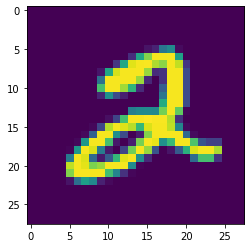

In [11]:
print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape )
print("x_test shape: ", x_test.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (60000, 28, 28)
y_train shape:  (60000,)
x_test shape:  (10000, 28, 28)
y_test shape:  (10000,)


### Preprocess dataset

In [0]:
x_train = x_train/255.0
x_test = x_test/255.0

In [15]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
print("reshaped x_train shape: ", x_train.shape)
print("reshaped x_test shape: ", x_test.shape)

reshaped x_train shape:  (60000, 28, 28, 1)
reshaped x_test shape:  (10000, 28, 28, 1)


### Build and Compile Model

In [18]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=x_train[0].shape))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)              

In [0]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
history = model.fit(x_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 149s 318ms/step - loss: 0.2427 - accuracy: 0.9270 - val_loss: 0.0580 - val_accuracy: 0.9810
Epoch 2/10
469/469 [==============================] - 146s 312ms/step - loss: 0.0873 - accuracy: 0.9735 - val_loss: 0.0418 - val_accuracy: 0.9868
Epoch 3/10
469/469 [==============================] - 147s 313ms/step - loss: 0.0653 - accuracy: 0.9807 - val_loss: 0.0324 - val_accuracy: 0.9881
Epoch 4/10
469/469 [==============================] - 146s 311ms/step - loss: 0.0532 - accuracy: 0.9839 - val_loss: 0.0323 - val_accuracy: 0.9893
Epoch 5/10
469/469 [==============================] - 149s 317ms/step - loss: 0.0444 - accuracy: 0.9860 - val_loss: 0.0354 - val_accuracy: 0.9893
Epoch 6/10
469/469 [==============================] - 146s 312ms/step - loss: 0.0400 - accuracy: 0.9872 - val_loss: 0.0302 - val_accuracy: 0.9905
Epoch 7/10
469/469 [==============================] - 146s 311ms/step - loss: 0.0349 - accuracy: 0.9888 - val_loss: 0.0283 -

In [21]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 7s 22ms/step - loss: 0.0319 - accuracy: 0.9917


[0.031860072165727615, 0.9916999936103821]

### Learning Curve

In [0]:
def plot_learningCurve(history, epochs):
  epoch_range = range(1, epochs+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title("Accuracy Model")
  plt.ylabel("Accuracy")
  plt.xlabel("Epoch")
  plt.legend(['Train', 'Validation'], loc='upper right')
  plt.show()

  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title("Loss Model")
  plt.ylabel("Loss")
  plt.xlabel("Epoch")
  plt.legend(['Train', 'Validation'], loc='upper right')
  plt.show()

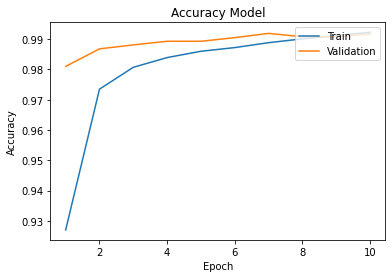

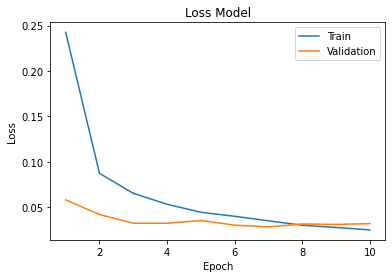

In [25]:
plot_learningCurve(history, 10)